正則化

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 真の関数
def g(x):
    return 0.1 * (x ** 3 + x ** 2 + x)

# 真の関数にノイズを加えた学習データを適当な数だけ用意する
train_x = np.linspace(-2, 2, 8)
train_y = g(train_x) + np.random.randn(train_x.size) * 0.05

# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

In [2]:
# 学習データの行列を作る
def to_matrix(x):
    return np.vstack([
        np.ones(x.size),
        x,
        x ** 2,
        x ** 3,
        x ** 4,
        x ** 5,
        x ** 6,
        x ** 7,
        x ** 8,
        x ** 9,
        x ** 10
    ]).T

X = to_matrix(train_z)

In [3]:
# パラメータの初期化
theta = np.random.randn(X.shape[1])

# 予測関数
def f(x):
    return np.dot(x, theta)

# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

# 正則化定数
LAMBDA = 0.5

# 学習率
ETA = 1e-4

# 誤差
diff = 1

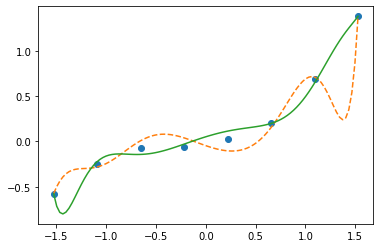

In [4]:
# 正則化を適用せずに学習を繰り返す
error = E(X, train_y)
while diff > 1e-6:
    theta = theta - ETA * (np.dot(f(X) - train_y, X))

    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

theta1 = theta

# 正則化を適用して学習を繰り返す
theta = np.random.randn(X.shape[1])
diff = 1
error = E(X, train_y)
while diff > 1e-6:
    reg_term = LAMBDA * np.hstack([0, theta[1:]])
    theta = theta - ETA * (np.dot(f(X) - train_y, X) + reg_term)

    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

theta2 = theta

# プロットして確認
plt.plot(train_z, train_y, 'o')
z = standardize(np.linspace(-2, 2, 100))
theta = theta1 # 正則化なし
plt.plot(z, f(to_matrix(z)), linestyle='dashed')
theta = theta2 # 正則化あり
plt.plot(z, f(to_matrix(z)))
plt.show()